# ANALYSIS

## 1. Exploración de Datos


## a. Volumen de Correos por Categoría


categoria
factura     9
contrato    5
general     2
acceso      1
Name: count, dtype: int64


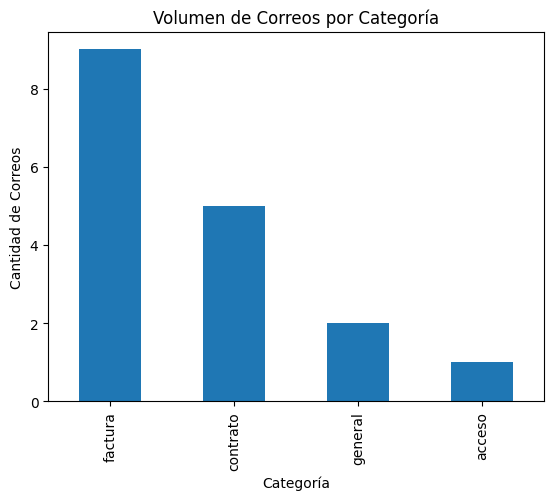

In [3]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# Define the database connection parameters
user = 'root'
password = 'root'
host = '127.0.0.1'
port = '3306'
database = 'atc'

# Create the SQLAlchemy engine
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}')


# Leer los datos de la base de datos
emails = pd.read_sql('SELECT * FROM emails', engine)

# Quitar los emails de los clientes con impagos
impagos = pd.read_sql('SELECT * FROM impagos', engine)
clientes_con_impagos = impagos['client_id'].unique()
emails = emails[~emails['client_id'].isin(clientes_con_impagos)]

# Definir categorías
emails['categoria'] = 'general'
emails.loc[emails['email'].str.contains('factura', case=False), 'categoria'] = 'factura'
emails.loc[emails['email'].str.contains('contrato', case=False), 'categoria'] = 'contrato'
emails.loc[emails['email'].str.contains('acceso', case=False), 'categoria'] = 'acceso'

# Volumen de correos por categoría
volumen_por_categoria = emails['categoria'].value_counts()
print(volumen_por_categoria)

# Graficar el volumen de correos por categoría
volumen_por_categoria.plot(kind='bar')
plt.title('Volumen de Correos por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Correos')
plt.show()


# b. Distribución Temporal de Correos


año
2022    17
Name: count, dtype: int64


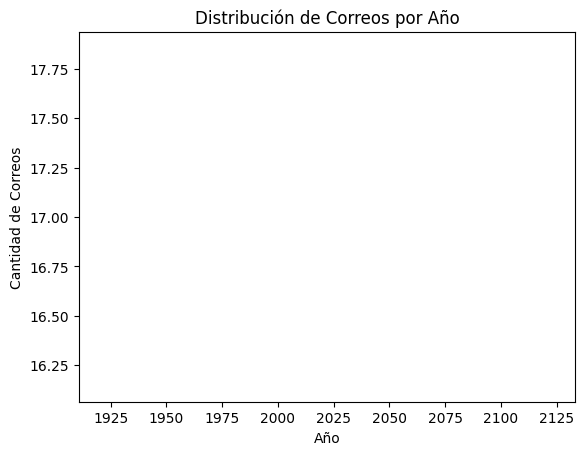

mes
1     2
2     1
3     2
4     3
5     3
6     1
8     3
9     1
11    1
Name: count, dtype: int64


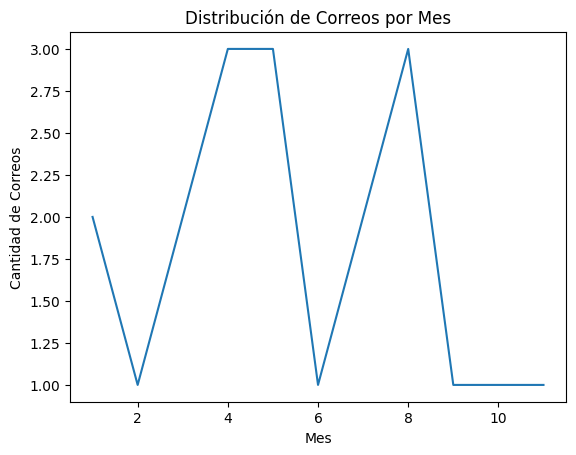

hora
6     4
7     2
8     1
19    6
20    4
Name: count, dtype: int64


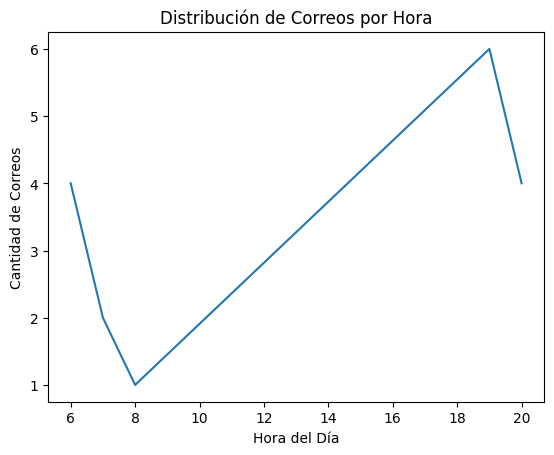

In [4]:
# Convertir la columna de fecha a datetime
emails['fecha_envio'] = pd.to_datetime(emails['fecha_envio'])

# Agregar columnas adicionales para análisis temporal
emails['año'] = emails['fecha_envio'].dt.year
emails['mes'] = emails['fecha_envio'].dt.month
emails['día'] = emails['fecha_envio'].dt.day
emails['hora'] = emails['fecha_envio'].dt.hour

# Distribución de correos por año
correos_por_año = emails['año'].value_counts().sort_index()
print(correos_por_año)

# Graficar la distribución de correos por año
correos_por_año.plot(kind='line')
plt.title('Distribución de Correos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Correos')
plt.show()

# Distribución de correos por mes
correos_por_mes = emails['mes'].value_counts().sort_index()
print(correos_por_mes)

# Graficar la distribución de correos por mes
correos_por_mes.plot(kind='line')
plt.title('Distribución de Correos por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Correos')
plt.show()

# Distribución de correos por hora
correos_por_hora = emails['hora'].value_counts().sort_index()
print(correos_por_hora)

# Graficar la distribución de correos por hora
correos_por_hora.plot(kind='line')
plt.title('Distribución de Correos por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Correos')
plt.show()
